
# Incision quality evaluation

## Introduction

Distance learning through online means has proven its value in the past. Its epidemiological and energy-economic benefits continue to increase its relevance. However, some subjects seem almost impossible to teach by video. Among such subjects is the teaching of surgery. The goal of our application is to teach this very subject.


![Surgery suturing course at Summer School of Experimental Surgery](https://kky-sw.zcu.cz/uploads/software/pigleg/SSES_2981.jpg "Surgery suturing course at Summer School of Experimental Surgery")
Surgery suturing course at Summer School of Experimental Surgery


Using AI and machine learning tools, we aim to reduce the demands on the teacher and facilitate an objective assessment of the accuracy of student performance. The teaching is then done by video chat, and the AI based measurement complements the evaluation of the results.

![Scene setup](https://kky-sw.zcu.cz/uploads/software/pigleg/scene_setup.jpg "Scene setup")
Scene setup for online course of surgery

## The assignment

The goal of this assignment is to evaluate the quality of surgical stitching based on the image of the incision and the stitch. Students will be provided with a set of images depicting incisions and stitches made during a surgical procedure. The task of the students will be to use computer vision methods to extract and segment image data, and then use machine learning methods to perform qualitative analysis of the stitching. Students will evaluate the quality of the stitching based on number of stiches.





* The submission is expected to be a link to git repository
* Repository name contains identification of your team
* The final report in PDF is in the repository root
* There is file in your repository `src/run.py`
* The first argument is always output `.csv` file
* The second argument might be `-v`. It will start visual mode with debug images.
* The `src/run.py` accepts image filenames as arguments

### Example: run
```bash
cd GithubProjects/ZDO_Team99/src
python run.py output.csv incision001.jpg incision005.png incision010.JPEG
```

### Example: run with visualization
```bash
python run.py output.csv -v incision001.jpg incision005.png
```

### Output csv

The structure of the output file is demonstrated in the example bellow.
Header is "filename" and "n_stiches".

```csv
filename, n_stiches
incision000.jpg , 5 # image contains 5 stiches
incision001.jpg , 2
incision003.jpg , 0
incision002.jpg , -1 # image could not be processed
```

## Data

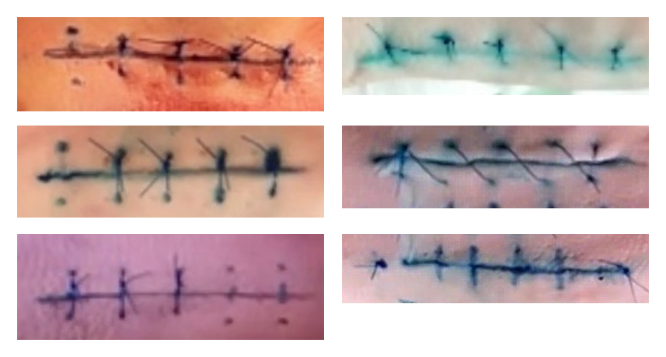

Examples of single stitch on the left. Various more complex stitch types are presented on the right (Allgöwer, Running transcutaneous, Running intracutaneous)



## Data annotation

We use CVAT for annotating data.

* Create an account on our installation of CVAT: [http://147.228.47.24:8080/](http://147.228.47.24:8080/)
* Send us your login on zeleznyt@kky.zcu.cz or strakajk@kky.zcu.cz
* We will give you a job
* Annotate your images
  * Draw new polyline -> Shape
  * Press 'n' for to end the input
  * Expand 'Details' and select the type of the stitch. Usually it would be 'Single'. Select 'Wrong', if the image is somehow not usefull for evaluation.
  * Save the output
  * Go to next annotation
  * If all your annotations are done, click Menu -> Change job state -> Completed



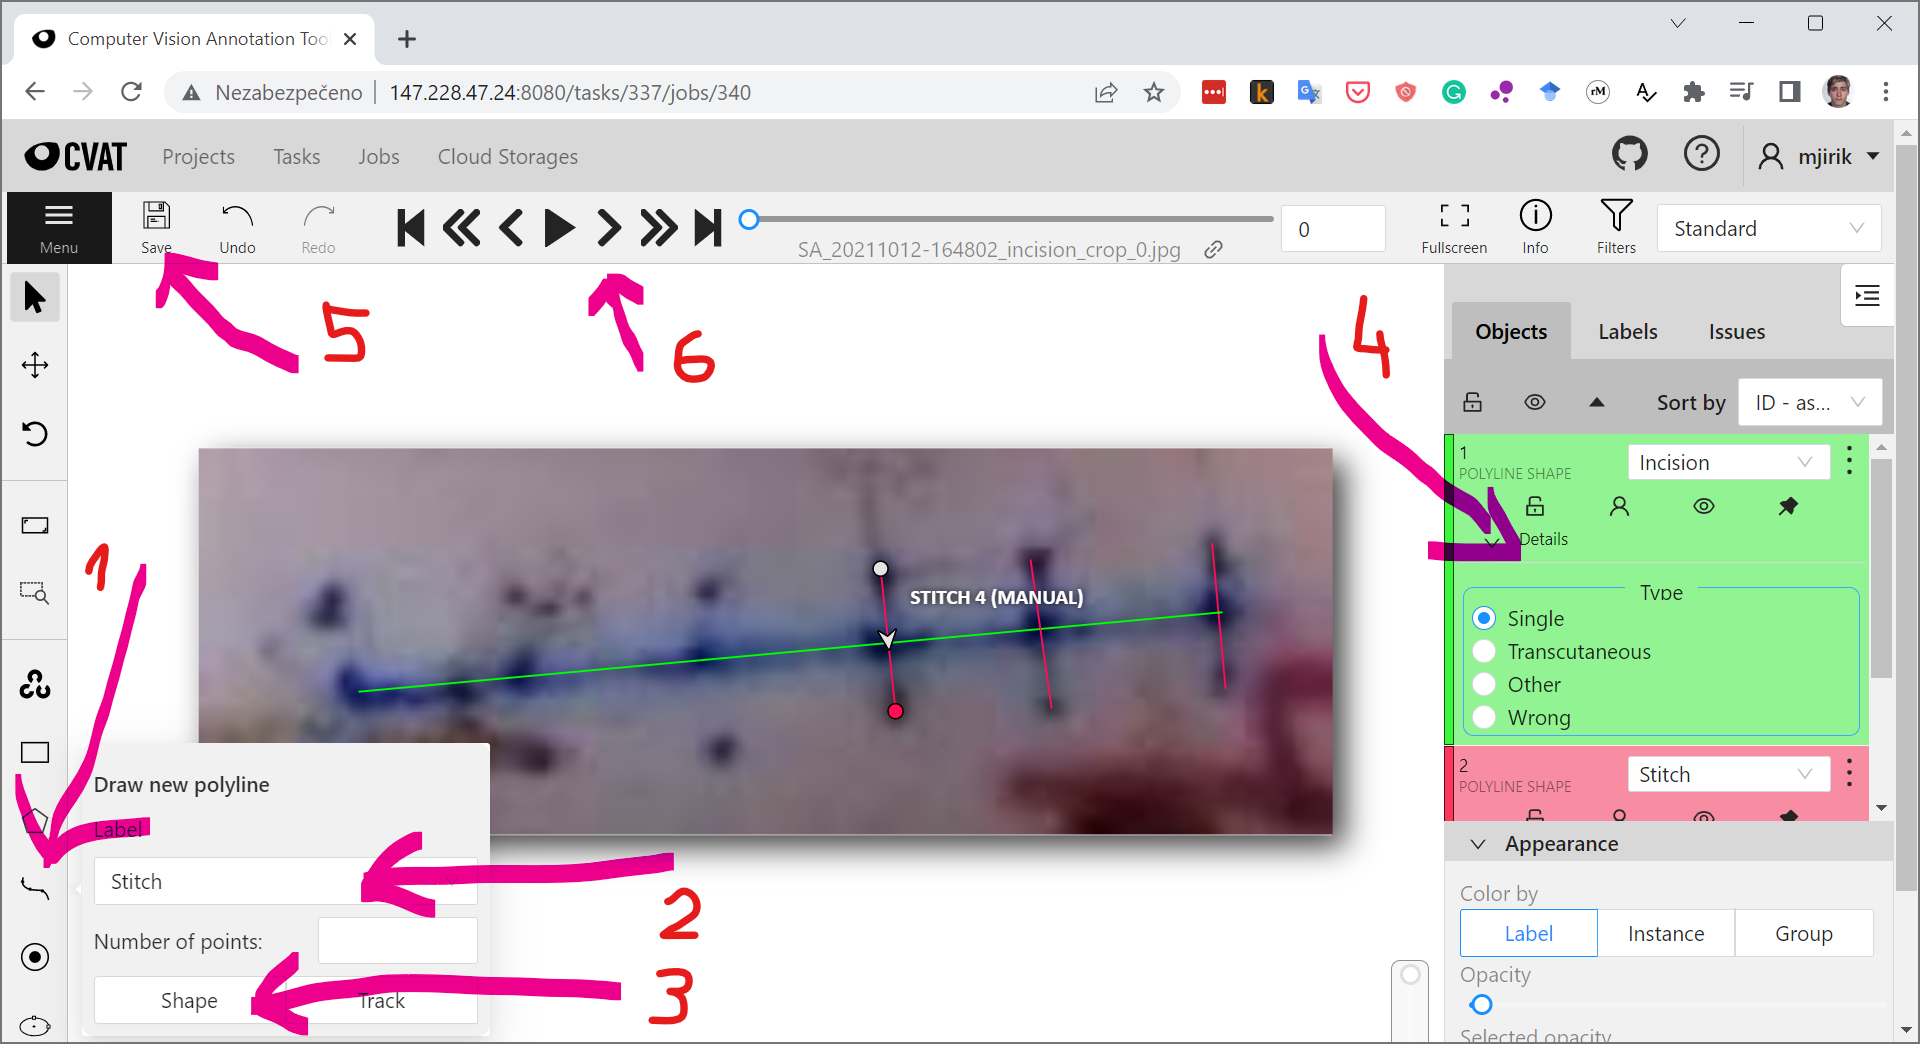

## Work with the annotation

Export task dataset from CVAT: Menu -> Export task dataset ->  CVAT for images



In [ ]:
# Incision quality evaluationn

!wget "https://drive.google.com/file/d/1sGIrkLYyy--SOCHTA6rF1EHLZ8kbWJIm/view?usp=share_link"
!pip install xmltodict

--2024-03-05 15:10:37--  https://drive.google.com/file/d/1sGIrkLYyy--SOCHTA6rF1EHLZ8kbWJIm/view?usp=share_link
Resolving drive.google.com (drive.google.com)... 173.194.202.101, 173.194.202.113, 173.194.202.100, ...
Connecting to drive.google.com (drive.google.com)|173.194.202.101|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘view?usp=share_link’

view?usp=share_link     [ <=>                ]  85.26K  --.-KB/s    in 0.004s  

2024-03-05 15:10:38 (20.3 MB/s) - ‘view?usp=share_link’ saved [87303]



In [ ]:
import xmltodict
import pprint
import json
from matplotlib import pyplot as plt
import numpy as np

with open('annotations.xml') as fd:
    doc = xmltodict.parse(fd.read())

doc["annotations"].keys()

ModuleNotFoundError: No module named 'xmltodict'

In [ ]:
doc["annotations"]["meta"]["task"]["updated"]

'2023-03-06 10:51:39.788448+00:00'

In [ ]:
doc["annotations"]["image"][0]

{'@id': '0',
 '@name': 'SA_20211012-164802_incision_crop_0.jpg',
 '@width': '182',
 '@height': '62',
 'polyline': [{'@label': 'Stitch',
   '@occluded': '0',
   '@source': 'manual',
   '@points': '109.47,19.32;111.88,42.19',
   '@z_order': '0'},
  {'@label': 'Stitch',
   '@occluded': '0',
   '@source': 'manual',
   '@points': '133.55,17.87;136.92,41.71',
   '@z_order': '0'},
  {'@label': 'Stitch',
   '@occluded': '0',
   '@source': 'manual',
   '@points': '162.69,15.22;164.85,38.58',
   '@z_order': '0'},
  {'@label': 'Incision',
   '@occluded': '0',
   '@source': 'manual',
   '@points': '25.67,39.06;164.37,26.30',
   '@z_order': '0',
   'attribute': {'@name': 'Type', '#text': 'Single'}}]}

array([[ 25.67,  39.06],
       [164.37,  26.3 ]])

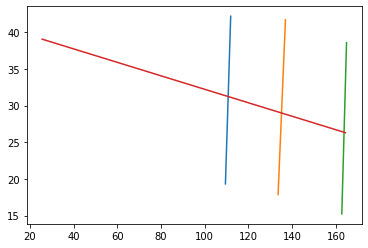

In [ ]:
image_id = 0

plt.figure()
for pline in doc["annotations"]["image"][image_id]["polyline"]:
  # extract coodrinates
  pts = np.array([pt.split(",") for pt in pline["@points"].split(";")], dtype=float)
  plt.plot(pts[:,0], pts[:, 1])
pts

# Write JSON

In [ ]:
d = {
     "asas": 15,
     "sdf": [[1.2], [5] ]
}

In [ ]:
import json

data = [
    { "filename": "incision001.jpg",
      "incision_polyline": [[ 109.47, 19.32],[111.88,42.19]],
      "crossing_positions": [13.8, 18.1, 19.0],
      "crossing_angles": [87.1, 92.3, 75.0],
    },
  ]


with open('data.json', 'w', encoding='utf-8') as f:
    json.dump(data, f, ensure_ascii=False, indent=4)

# Convert CVAT annotation into JSON

In [ ]:
# Script to convert CVAT annotations stored in xml to json format
import sys
import xmltodict
import json
import numpy as np


with open(sys.argv[1]) as fd:
    doc = xmltodict.parse(fd.read())


data_list = []
for anno in doc["annotations"]["image"]:
    data = {}
    data['width'] = int(anno['@width'])
    data['height'] = int(anno['@height'])
    data['name'] = anno['@name']
    data['stitches'] = []
    data['incisions'] = []
    if "polyline" in anno:
        if not isinstance(anno["polyline"], list):
            pts = [[float(x) for x in pt.split(",")] for pt in anno["polyline"]["@points"].split(";")]
            if pline['@label'] == 'Incision':
                data['incisions'].append(pts)
            if pline['@label'] == 'Stitch':
                data['stitches'].append(pts)

        else:
            for pline in anno["polyline"]:
                pts = [[float(x) for x in pt.split(",")] for pt in pline["@points"].split(";")]
                if pline['@label'] == 'Incision':
                    data['incisions'].append(pts)
                if pline['@label'] == 'Stitch':
                    data['stitches'].append(pts)

    data_list.append(data)

with open(sys.argv[2],'w') as fw:
   json.dump(data_list, fw)

# Calculate intersection of two lines

In [ ]:
import sys
import math
import json
import cv2
import random
import numpy as np
import matplotlib.pyplot as plt

def intersectLines( pt1, pt2, ptA, ptB ):
    """ this returns the intersection of Line(pt1,pt2) and Line(ptA,ptB)

        returns a tuple: (xi, yi, valid, r, s), where
        (xi, yi) is the intersection
        r is the scalar multiple such that (xi,yi) = pt1 + r*(pt2-pt1)
        s is the scalar multiple such that (xi,yi) = pt1 + s*(ptB-ptA)
            valid == 0 if there are 0 or inf. intersections (invalid)
            valid == 1 if it has a unique intersection ON the segment    """

    DET_TOLERANCE = 0.00000001

    # the first line is pt1 + r*(pt2-pt1)
    # in component form:
    x1, y1 = pt1;   x2, y2 = pt2
    dx1 = x2 - x1;  dy1 = y2 - y1

    # the second line is ptA + s*(ptB-ptA)
    x, y = ptA;   xB, yB = ptB;
    dx = xB - x;  dy = yB - y;

    # we need to find the (typically unique) values of r and s
    # that will satisfy
    #
    # (x1, y1) + r(dx1, dy1) = (x, y) + s(dx, dy)
    #
    # which is the same as
    #
    #    [ dx1  -dx ][ r ] = [ x-x1 ]
    #    [ dy1  -dy ][ s ] = [ y-y1 ]
    #
    # whose solution is
    #
    #    [ r ] = _1_  [  -dy   dx ] [ x-x1 ]
    #    [ s ] = DET  [ -dy1  dx1 ] [ y-y1 ]
    #
    # where DET = (-dx1 * dy + dy1 * dx)
    #
    # if DET is too small, they're parallel
    #
    DET = (-dx1 * dy + dy1 * dx)

    if math.fabs(DET) < DET_TOLERANCE: return (0,0,0,0,0)

    # now, the determinant should be OK
    DETinv = 1.0/DET

    # find the scalar amount along the "self" segment
    r = DETinv * (-dy  * (x-x1) +  dx * (y-y1))

    # find the scalar amount along the input line
    s = DETinv * (-dy1 * (x-x1) + dx1 * (y-y1))

    # return the average of the two descriptions
    xi = (x1 + r*dx1 + x + s*dx)/2.0
    yi = (y1 + r*dy1 + y + s*dy)/2.0

    ##############
    #found is intersection (xi,yi) in inner segment
    valid = 0
    if x1 != x2:
        if x1 < x2:
            a = x1
            b = x2
        else:
            a = x2
            b = x1
        c = xi
    else:
        #predpoklad, ze pak y jsou ruzne
        if y1 < y2:
            a = y1
            b = y2
        else:
            a = y2
            b = y1
        c = yi
    if (c > a) and (c < b):
        #now second segment
        if x != xB:
            if x < xB:
                a = x
                b = xB
            else:
                a = xB
                b = x
            c = xi
        else:
            #predpoklad, ze pak y jsou ruzne
            if y < yB:
                a = y
                b = yB
            else:
                a = yB
                b = y
            c = yi
        if (c > a) and (c < b):
            valid = 1

    return ( xi, yi, valid, r, s )






# Evaluation of JSON

In [ ]:

####################
def proces_data(data_path):

    with open(data_path+'/annotations.json') as json_file:
        data = json.load(json_file)

    annotations = {}
    for d in data:
        file_name = data_path+'/images/'+d['name']
        #print(file_name)
        im = cv2.imread(file_name)

        incisions = np.array(d['incisions'])
        for p_i in incisions:
            p = np.array(p_i)
            plt.plot(p[:,0], p[:,1])

        stitches = np.array(d['stitches'])
        for p_s in stitches:
            p = np.array(p_s)
            plt.plot(p[:,0], p[:,1])


        ############
        incision_alphas = []
        incision_lines = []
        for incision in incisions:
            for (p_1, p_2) in zip(incision[:-1],incision[1:]):
                p1 = np.array(p_1)
                p2 = np.array(p_2)
                dx = p2[0]-p1[0]
                dy = p2[1]-p1[1]
                if dy == 0:
                    alpha = 90.0
                elif dx == 0:
                    alpha = 0.0
                else:
                    alpha = 90 + 180.*np.arctan(dy/dx)/np.pi
                incision_alphas.append(alpha)
                incision_lines.append([p1, p2])

        stitche_alphas = []
        stitche_lines = []
        for stitche in stitches:
            for (p_1, p_2) in zip(stitche[:-1],stitche[1:]):
                p1 = np.array(p_1)
                p2 = np.array(p_2)
                dx = p2[0]-p1[0]
                dy = p2[1]-p1[1]
                if dy == 0:
                    alpha = 90.0
                elif dx == 0:
                    alpha = 180.0
                else:
                    alpha = 90 + 180.*np.arctan(dy/dx)/np.pi
                stitche_alphas.append(alpha)
                stitche_lines.append([p1, p2])


        ###############
        # analyze alpha for each pair of line segments
        intersections = []
        intersections_alphas = []
        for (incision_line, incision_alpha) in zip(incision_lines, incision_alphas):
            for (stitche_line, stitche_alpha) in zip(stitche_lines, stitche_alphas):

                p0, p1 = incision_line
                pA, pB = stitche_line
                (xi, yi, valid, r, s) = intersectLines(p0, p1, pA, pB)
                if valid == 1:
                    intersections.append([xi, yi])
                    alpha_diff = abs(incision_alpha - stitche_alpha)
                    alpha_diff = 180.0 - alpha_diff if alpha_diff > 90.0 else alpha_diff
                    alpha_diff = 90 - alpha_diff
                    intersections_alphas.append(alpha_diff)

        # visualize
        if True:
            plt.imshow(im)
            for ((xi,yi), alpha) in zip(intersections, intersections_alphas):

                plt.plot(xi, yi, 'o')
                plt.text(xi, yi,'{:2.1f}'.format(alpha), c='green', bbox={'facecolor': 'white', 'alpha': 1.0, 'pad': 1}, size='large')

            plt.show()

    return intersections, intersections_alphas

# Find the most left and right point

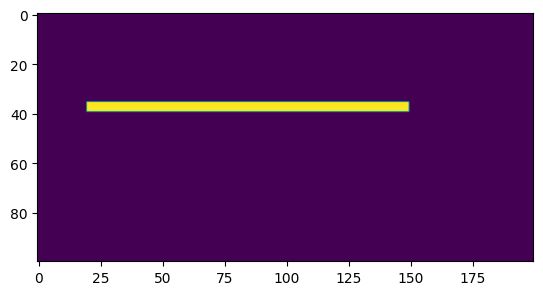

In [ ]:
im = np.zeros([100, 200])
im[36:40, 20:150] = 1
plt.imshow(im)
plt.show()

In [ ]:
yy, xx = np.nonzero(im)
indx = np.argmax(xx)

most_left_point = xx[indx], yy[indx]
most_left_point

(149, 36)

In [ ]:
indx

129